In [23]:
import os
import pandas as pd

# list files
path = os.getcwd()
files = os.listdir(path)
files

# Pick out 'xls' files
files_xlsx = [f for f in files if f[-4:] == 'xlsx']
files_xlsx

# initialize empty dataframe
df = pd.DataFrame()

# loop over list of files to append to empty dataframe

for f in files_xlsx:
    data = pd.read_excel(f)
    df = df.append(data)

df.shape

(110909, 10)

In [27]:
# df times

def wrangle(X):
    
    X = X.copy()
    
    # Extract components from 'Date', then drop original column
    X['year'] = X['Date'].dt.year
    X['month'] = X['Date'].dt.month
    X['day'] = X['Date'].dt.day
    # X = X.drop(columns='Date')
  
    # 'Time' is a timestamp: we have hour and minute information
    # Extract components from 'Time', then drop original column
    X['Time'] = pd.to_datetime(X['Time'], infer_datetime_format=True)
    X['hour'] = X['Time'].dt.hour
    X['minute'] = X['Time'].dt.minute
    # X = X.drop(columns='Time')
    
    return X

df = wrangle(df)

In [31]:
# sort by columns first
df.sort_values(by=['Date', 'Time'], ascending=True)

,Date,Time,Day,Station,Code,Min Delay,Min Gap,Bound,Line,Vehicle,year,month,day,hour,minute
0,2014-01-01,2019-08-28 00:21:00,Wednesday,VICTORIA PARK STATION,MUPR1,55,60,W,BD,5111,2014,1,1,0,21
1,2014-01-01,2019-08-28 02:06:00,Wednesday,HIGH PARK STATION,SUDP,3,7,W,BD,5001,2014,1,1,2,6
2,2014-01-01,2019-08-28 02:40:00,Wednesday,SHEPPARD STATION,MUNCA,0,0,NaN,YU,0,2014,1,1,2,40
3,2014-01-01,2019-08-28 03:10:00,Wednesday,LANSDOWNE STATION,SUDP,3,8,W,BD,5116,2014,1,1,3,10
4,2014-01-01,2019-08-28 03:20:00,Wednesday,BLOOR STATION,MUSAN,5,10,S,YU,5386,2014,1,1,3,20
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1700,2019-05-31,2019-08-28 21:18:00,Friday,GLENCAIRN STATION,MUNCA,0,0,NaN,YU,0,2019,5,31,21,18
1701,2019-05-31,2019-08-28 22:00:00,Friday,YUS/BD/SHEPPARD SUBWAY,MUO,0,0,NaN,YU/BD,0,2019,5,31,22,0
1702,2019-05-31,2019-08-28 22:04:00,Friday,COXWELL STATION,TUO,3,7,E,BD,5155,2019,5,31,22,4
1703,2019-05-31,2019-08-28 22:57:00,Friday,OSGOODE STATION,MUIS,0,0,NaN,YU,0,2019,5,31,22,57


In [38]:
# this gives number of delays per 'Date'
df['count'] = df.groupby('Date')['Date'].transform('count')

df.head(50)

,Date,Time,Day,Station,Code,Min Delay,Min Gap,Bound,Line,Vehicle,year,month,day,hour,minute,count
0,2018-12-01,2019-08-28 00:11:00,Saturday,YONGE BD STATION,SUDP,0,0,NaN,BD,0,2018,12,1,0,11,41
1,2018-12-01,2019-08-28 01:13:00,Saturday,DUNDAS WEST STATION,SUAP,0,0,W,BD,5339,2018,12,1,1,13,41
2,2018-12-01,2019-08-28 01:35:00,Saturday,SHEPPARD STATION,EUSC,0,0,N,YU,5651,2018,12,1,1,35,41
3,2018-12-01,2019-08-28 01:46:00,Saturday,DUNDAS WEST STATION,SUO,4,8,W,BD,5339,2018,12,1,1,46,41
4,2018-12-01,2019-08-28 01:51:00,Saturday,WOODBINE STATION,SUDP,0,0,NaN,BD,0,2018,12,1,1,51,41
5,2018-12-01,2019-08-28 06:00:00,Saturday,ST GEORGE TO FINCH WES,MUO,0,0,NaN,YU,0,2018,12,1,6,0,41
6,2018-12-01,2019-08-28 06:08:00,Saturday,WOODBINE STATION,TUKEY,8,12,E,BD,5080,2018,12,1,6,8,41
7,2018-12-01,2019-08-28 06:33:00,Saturday,QUEEN'S PARK STATION,TUSC,0,0,S,YU,6016,2018,12,1,6,33,41
8,2018-12-01,2019-08-28 07:43:00,Saturday,VICTORIA PARK STATION,MUDD,6,10,W,BD,5200,2018,12,1,7,43,41
9,2018-12-01,2019-08-28 08:39:00,Saturday,MCCOWAN STATION,ERCO,4,10,S,SRT,3026,2018,12,1,8,39,41


In [42]:
df.Date.count

<bound method Series.count of 0      2018-12-01
1      2018-12-01
2      2018-12-01
3      2018-12-01
4      2018-12-01
          ...    
1880   2018-07-31
1881   2018-07-31
1882   2018-07-31
1883   2018-07-31
1884   2018-07-31
Name: Date, Length: 110909, dtype: datetime64[ns]>

In [66]:
# just at the first 40 lines

y=2
z=41


for i in range(y, z):
    df['new'] = 0
    if df.Line.iloc[y] == df.Line.iloc[y-1]:
            df['new'].loc[y] = 1
    else:
            df['new'].loc[y] = 0
    y =+ 1

In [67]:
df.head(50)

,Date,Time,Day,Station,Code,Min Delay,Min Gap,Bound,Line,Vehicle,year,month,day,hour,minute,count,new
0,2018-12-01,2019-08-28 00:11:00,Saturday,YONGE BD STATION,SUDP,0,0,NaN,BD,0,2018,12,1,0,11,41,0
1,2018-12-01,2019-08-28 01:13:00,Saturday,DUNDAS WEST STATION,SUAP,0,0,W,BD,5339,2018,12,1,1,13,41,1
2,2018-12-01,2019-08-28 01:35:00,Saturday,SHEPPARD STATION,EUSC,0,0,N,YU,5651,2018,12,1,1,35,41,0
3,2018-12-01,2019-08-28 01:46:00,Saturday,DUNDAS WEST STATION,SUO,4,8,W,BD,5339,2018,12,1,1,46,41,0
4,2018-12-01,2019-08-28 01:51:00,Saturday,WOODBINE STATION,SUDP,0,0,NaN,BD,0,2018,12,1,1,51,41,0
5,2018-12-01,2019-08-28 06:00:00,Saturday,ST GEORGE TO FINCH WES,MUO,0,0,NaN,YU,0,2018,12,1,6,0,41,0
6,2018-12-01,2019-08-28 06:08:00,Saturday,WOODBINE STATION,TUKEY,8,12,E,BD,5080,2018,12,1,6,8,41,0
7,2018-12-01,2019-08-28 06:33:00,Saturday,QUEEN'S PARK STATION,TUSC,0,0,S,YU,6016,2018,12,1,6,33,41,0
8,2018-12-01,2019-08-28 07:43:00,Saturday,VICTORIA PARK STATION,MUDD,6,10,W,BD,5200,2018,12,1,7,43,41,0
9,2018-12-01,2019-08-28 08:39:00,Saturday,MCCOWAN STATION,ERCO,4,10,S,SRT,3026,2018,12,1,8,39,41,0


In [49]:
# add a 'counter' column for the for-loop to cycle through

for date in df['Date']:
    # this tells it when to stop
    count = 2
    stop = 41
    
    
            
            
    
    
    

In [36]:
mask = '2018-12-01'
df1 = df[df.Date == '2018-12-01']
df1.shape

(41, 16)

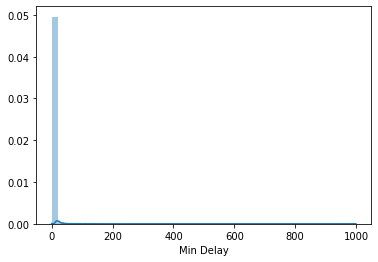

In [13]:
# Min delay: Delay (in minutes) to subway service
# Min gap: Time length (in minutes) between trains

import seaborn as sns
import matplotlib.pyplot as plt

sns.distplot(df['Min Delay'])
plt.show();

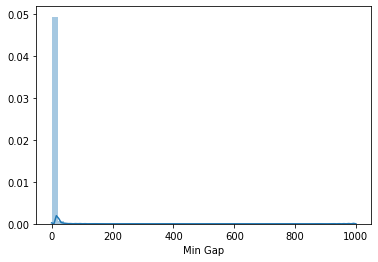

In [14]:
sns.distplot(df['Min Gap'])
plt.show();